# Mengimpor library yang diperlukan untuk analisis data dan visualisasi

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Employee.csv")

# Menampilkan rata-rata, standar deviasi, nilai minimun, nilai maksimum, Q1, Q2, dan Q3

# describe() berfungsi melihat statistik dari dataset hanya untuk atribut bertipe angka

# mean = rata-rata, std = standar deviasi, min = nilai minimum, 25% = Q1, 50% = Q2, 75% = Q3, max = nilai maksimum

In [17]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# menampilkan 10 record pertama dari dataset dengan attribute bertipe angka
# menggunakan select_dtypes dan include number sebagai parameter untuk memilih attribute bertipe angka
# head() digunakan untuk menampilkan 5 data awal jika parameter tidak ditentukan. head(10) berarti menampilkan data dari indeks 0-9

In [18]:
numeric = df.select_dtypes(include='number')
numeric.head(10)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
0,2017,3,34,0,0
1,2013,1,28,3,1
2,2014,3,38,2,0
3,2016,3,27,5,1
4,2017,3,24,2,1
5,2016,3,22,0,0
6,2015,3,38,0,0
7,2016,3,34,2,1
8,2016,3,23,1,0
9,2017,2,37,2,0


# menampilkan informasi jumlah record, jumlah attribute, nama attribute, dan jumlah attribute dengan tipe angka
# menggunakan shape untuk mengetahui jumlah record dan attribute
# menggunakan list untuk nama attribute yang diperoleh dari df.columns
# menggunakan len untuk menentukan panjang/jumlah dari attribute numeric
# membuat dictionary dengan key sesuai nama informasi

In [19]:
jml_rec, jml_atr = df.shape

dict = {
    'Jumlah Record': jml_rec,
    'Jumlah Attribute': jml_atr,
    'Nama Attribute': list(df.columns),
    'Jumlah Attribute Bertipe Angka': len(numeric.columns)
}

dict

{'Jumlah Record': 4653,
 'Jumlah Attribute': 9,
 'Nama Attribute': ['Education',
  'JoiningYear',
  'City',
  'PaymentTier',
  'Age',
  'Gender',
  'EverBenched',
  'ExperienceInCurrentDomain',
  'LeaveOrNot'],
 'Jumlah Attribute Bertipe Angka': 5}

# menampilkan jumlah label dari semua attribute yang bernilai object
# menggunakan 'select_dtypes' dan 'include='object'' sebagai parameter untuk memilih attribute bertipe object
# menggunakan iterasi untuk mengulang tiap attribute bertipe object dan menggunakan 'value_counts()' untuk menghitung jumlah kemunculan label dalam tiap attribute

In [20]:
object = df.select_dtypes(include='object')

for column in object.columns:
    print(f"Attribute: {column}")
    print(object[column].value_counts())
    print('\n')

Attribute: Education
Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64


Attribute: City
City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64


Attribute: Gender
Gender
Male      2778
Female    1875
Name: count, dtype: int64


Attribute: EverBenched
EverBenched
No     4175
Yes     478
Name: count, dtype: int64




# Visualisasikan dataset dengan grafik batang
# Pada grafik batang di bawah, kita dapat melihat perbandingan lokasi tempat dimana karyawan bekerja.
# Grafik ini membagi kota dalam 3 kategori : Bangalore, Pune, dan New Delhi.
# Bangalore : Sebanyak lebih dari 2000 karyawan bekerja disini. Bangalore termasuk lokasi dengan jumlah karyawan terbanyak dalam grafik. (Grafik Hijau)
# Pune : Sekitar 1250 karyawan bekerja di Pune. (Grafik Merah Muda)
# New Delhi : Sekitar 1150 karyawan bekerja di New Delhi. (Grafik Biru)

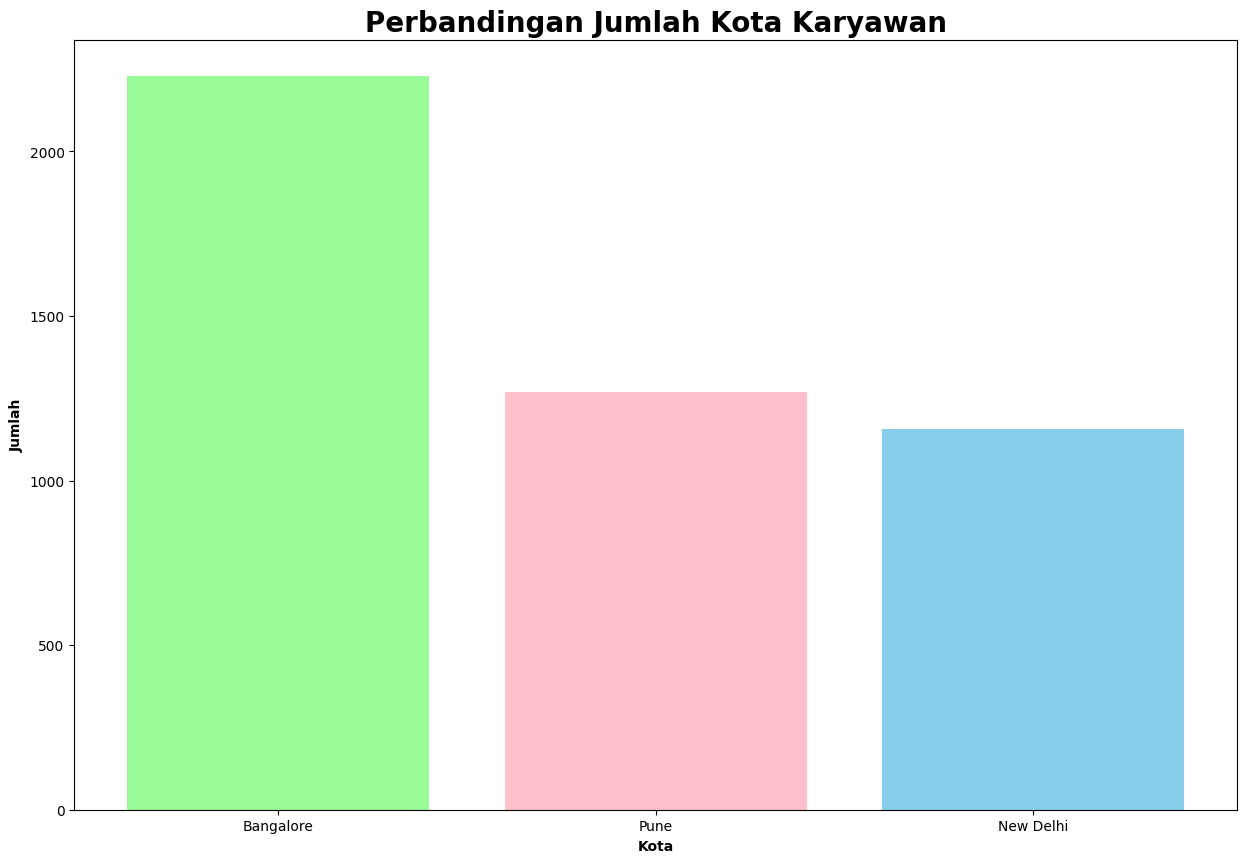

In [21]:
dfCity = df['City'].value_counts()

plt.figure(figsize=(15,10))
plt.bar(dfCity.index, dfCity,color=['palegreen','pink','skyblue'])
plt.xlabel('Kota', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.title('Perbandingan Jumlah Kota Karyawan', fontsize=20, fontweight='bold')
plt.show()

# Pada heatmap berikut, hanya data yang bersifat numerik yang ditampilkan korelasinya. Korelasi antar variabel diukur menggunakan skala dari -1 hingga 1.

- Korelasi Positif: Diwakili oleh warna merah hingga kuning dengan nilai mendekati 1. Artinya, jika nilai satu variabel meningkat, nilai variabel lain juga cenderung meningkat.
- Korelasi Negatif: Diwakili oleh warna pink hingga ungu dengan nilai mendekati -1. Artinya, jika nilai satu variabel meningkat, nilai variabel lain cenderung menurun.
- Korelasi Nol: Diwakili oleh warna terang (mendekati putih) dan nilai mendekati 0, menunjukkan bahwa tidak ada hubungan antara kedua variabel tersebut.
# Interpretasi dari Data :
- Joining Year dengan Payment Tier berkorelasi negatif: Artinya, karyawan yang bergabung lebih awal cenderung memiliki pendapatan yang lebih tinggi.
- Payment Tier dengan Age berkorelasi positif rendah: Terdapat korelasi yang lemah bahwa semakin tua usia karyawan, semakin tinggi tier pembayaran mereka.
- Age dengan ExperienceInCurrentDomain berkorelasi negatif: Artinya, semakin tua usia karyawan, justru pengalaman di bidangnya cenderung lebih sedikit.
- LeaveOrNot dengan Age berkorelasi negatif: Semakin tua usia karyawan, keinginan mereka untuk meninggalkan perusahaan lebih rendah.
- ExperienceInCurrentDomain dengan Payment Tier berkorelasi positif rendah: Terdapat hubungan positif yang lemah bahwa semakin tinggi pengalaman karyawan di bidangnya, semakin tinggi pula pendapatannya.

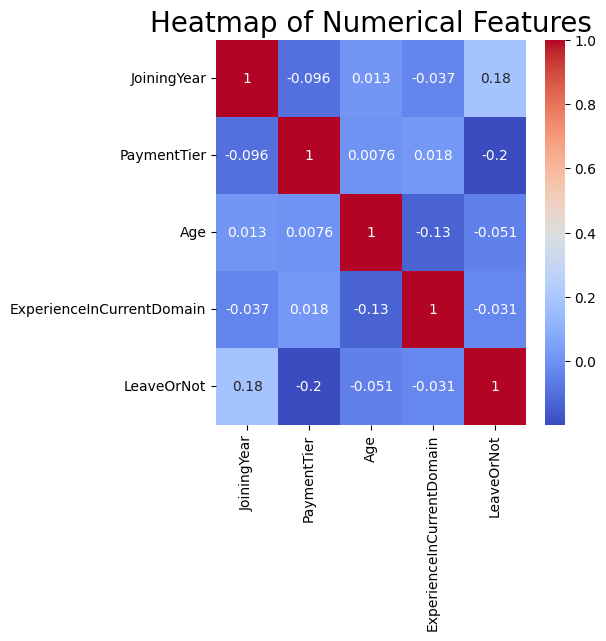

In [25]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(5, 5))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Features', fontsize=20)
plt.show()